
Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
random.seed(42)

Реализованы функции для вычисления интегралов
1. Методом прямоугольников (rectangle_method())
$$
s_i = f(\xi_i) \cdot \Delta x_i
$$
2. Методом трапеций (trapezoid_method())
$$
s_i = \left( f(x_{i-1}) + f(x_i) \right) \cdot \frac{|\Delta_i|}{2}
$$
3. Методом Симпсона (simpson_method()).
$$
s_i = \left( f(x_{i-1}) + 4 f\left( \frac{x_i + x_{i-1}}{2} \right) + f(x_i) \right) \cdot \frac{|\Delta_i|}{6}
$$


In [3]:
def f(x):
    return math.sin(2 * x)

def rectangle_method(a, b, n):

    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    S_left = sum(f(x[i-1]) * h for i in range(1, n + 1))
    print("Левые:", S_left)

    S_right = sum(f(x[i]) * h for i in range(1, n + 1))
    print("Правые:", S_right)

    S_mid = sum(f((x[i-1] + x[i]) / 2) * h for i in range(1, n + 1))
    print("Средние:", S_mid)

    S_rand = sum(f(x[i-1] + random.random() * h) * h for i in range(1, n + 1))
    print("Случайные:", S_rand)

def trapezoid_method(a, b, n):

    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    return sum((f(x[i - 1]) + f(x[i])) * h / 2 for i in range(1, n + 1))

def simpson_method(a, b, n):

    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    return sum((f(x[i - 1]) + 4 * f((x[i] + x[i - 1]) / 2) + f(x[i])) * h / 6 for i in range(1, n + 1))

rectangle_method(0, math.pi / 2, 24)
print("Метод трапеции:", trapezoid_method(0, math.pi / 2, 24))
print("Метод Симпсона:", simpson_method(0, math.pi / 2, 24))

Левые: 0.9985716979019744
Правые: 0.9985716979019744
Средние: 1.0007143040431583
Случайные: 0.997075327211255
Метод трапеции: 0.9985716979019744
Метод Симпсона: 1.000000101996097


Реализованы функции для построения графиков, используя ранее реализованные методы.

Графики построены для n = 4, 8, 16.

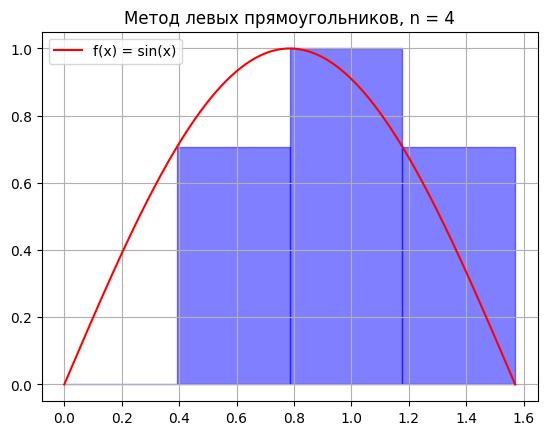

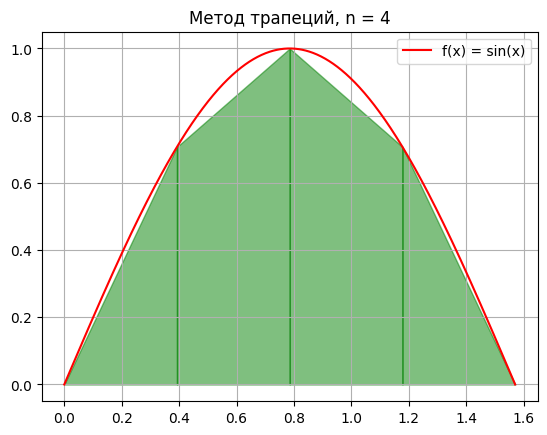

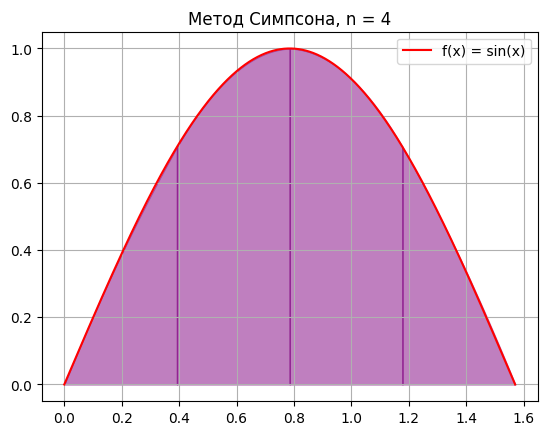

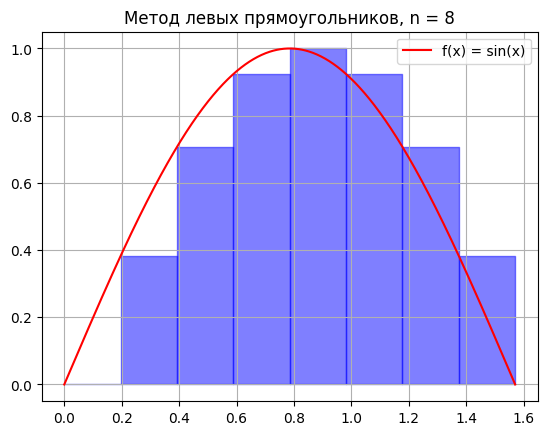

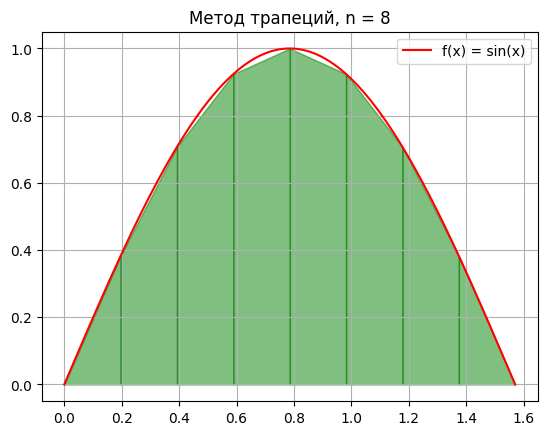

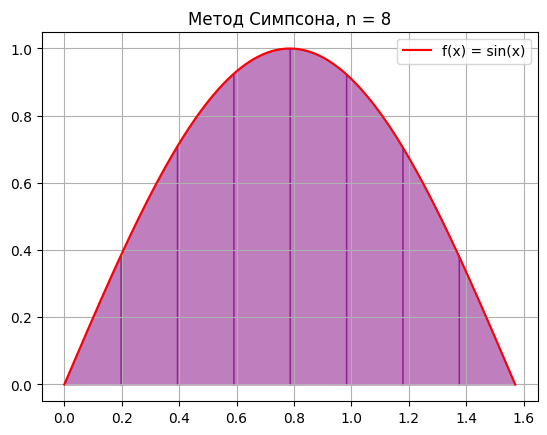

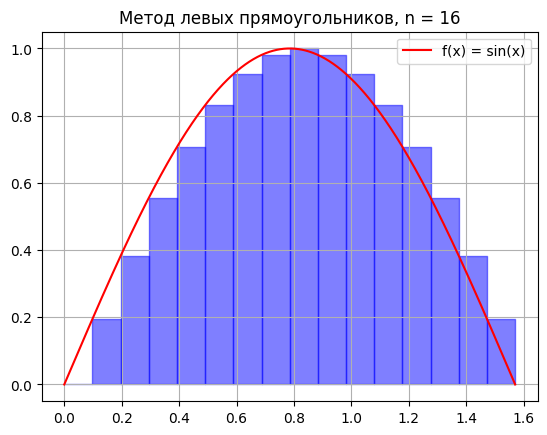

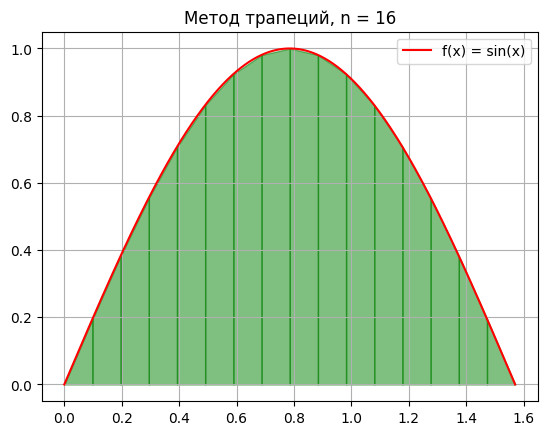

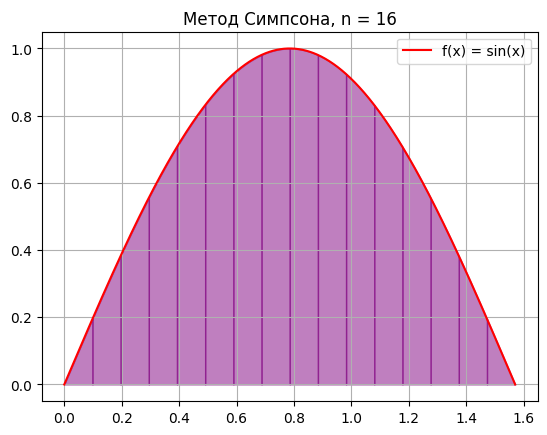

In [4]:
def plot_rectangle_method(n): # здесь и далее я использовал только метод левых прямоугольников
    a, b = 0, math.pi/2
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    x_smooth = np.linspace(a, b, 1000) # 1000 точек между a и b
    plt.plot(x_smooth, [f(xi) for xi in x_smooth], 'r', label='f(x) = sin(x)') # график функции

    for i in range(1, n + 1):
        # закрашивание прямоугольника
        plt.fill_between([x[i-1], x[i]], [0, 0], [f(x[i-1]), f(x[i-1])], alpha=0.5, color='blue')

    plt.title(f'Метод левых прямоугольников, n = {n}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_trapezoid_method(n):
    a, b = 0, math.pi/2
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    x_smooth = np.linspace(a, b, 1000)
    plt.plot(x_smooth, [f(xi) for xi in x_smooth], 'r', label='f(x) = sin(x)')

    for i in range(1, n + 1):
        plt.fill_between([x[i-1], x[i]], [f(x[i-1]), f(x[i])], alpha=0.5, color='green')

    plt.title(f'Метод трапеций, n = {n}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_simpson_method(n):
    a, b = 0, math.pi/2
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    x_smooth = np.linspace(a, b, 1000)
    plt.plot(x_smooth, [f(xi) for xi in x_smooth], 'r', label='f(x) = sin(x)')

    for i in range(1, n + 1):
        x_parabola = np.linspace(x[i-1], x[i], 100) # 100 точек между x[i-1] и x[i]
        mid = (x[i-1] + x[i]) / 2 # середина отрезка
        # коэффициенты параболы
        a_coef, b_coef, c_coef = np.polyfit([x[i-1], mid, x[i]], [f(x[i-1]), f(mid), f(x[i])], 2)
        # значения параболы в точках x_parabola
        y_parabola = a_coef * x_parabola**2 + b_coef * x_parabola + c_coef
        plt.fill_between(x_parabola, y_parabola, alpha=0.5, color='purple')

    plt.title(f'Метод Симпсона, n = {n}')
    plt.legend()
    plt.grid(True)
    plt.show()

for n in [4, 8, 16]:
    plot_rectangle_method(n)
    plot_trapezoid_method(n)
    plot_simpson_method(n)

Для n = 2
Левые: 0.7853981633974483
Правые: 0.7853981633974484
Средние: 1.1107207345395915
Случайные: 0.723909788826302

Для n = 4
Левые: 0.9480594489685199
Правые: 0.9480594489685199
Средние: 1.026172152977031
Случайные: 1.1596639474890504

Для n = 6
Левые: 0.9770486166568533
Правые: 0.9770486166568534
Средние: 1.0115151599274625
Случайные: 0.9597114197718718

Для n = 8
Левые: 0.9871158009727754
Правые: 0.9871158009727754
Средние: 1.006454542799564
Случайные: 0.9894133558758215

Для n = 10
Левые: 0.9917617687547273
Правые: 0.9917617687547273
Средние: 1.0041242039539873
Случайные: 1.0173943183501994

Для n = 12
Левые: 0.9942818882921579
Правые: 0.9942818882921579
Средние: 1.0028615075117908
Случайные: 1.0242610918939687

Для n = 14
Левые: 0.9958002136775373
Правые: 0.9958002136775373
Средние: 1.0021012157881395
Случайные: 1.0034825829068006

Для n = 16
Левые: 0.9967851718861697
Правые: 0.9967851718861697
Средние: 1.001608189083975
Случайные: 0.9935415268362882

Для n = 18
Левые: 0.9974

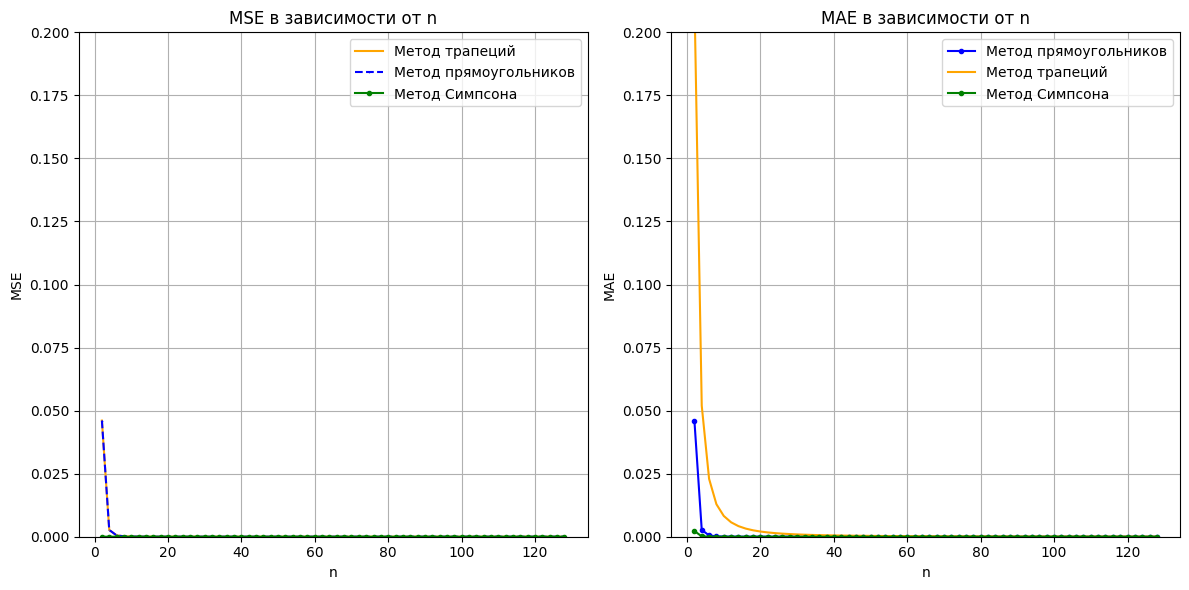

In [25]:
arr = [i * 2 for i in range(1, 65)] # массив значений n от 2 до 128
for n in arr:
    print(f"Для n = {n}")
    rectangle_method(0, math.pi / 2, n)
    trapezoid_method(0, math.pi / 2, n)
    simpson_method(0, math.pi / 2, n)
    print()

# метод левых прямоугольников
def left_rectangle_method(a, b, n):
    h = (b - a) / n
    return sum(f(a + i * h) for i in range(n)) * h

# истинное значение определенного интеграла для f(x) = sin(2x) на [0, pi/2]
true_value = 1.0

# массивы для MSE и MAE
mse_rectangle = []
mae_rectangle = []
mse_trapezoid = []
mae_trapezoid = []
mse_simpson = []
mae_simpson = []

# заполнение массивов для дальнейшего построения графиков
for n in arr:
    S_rectangle = left_rectangle_method(0, math.pi / 2, n)
    S_trapezoid = trapezoid_method(0, math.pi / 2, n)
    S_simpson = simpson_method(0, math.pi / 2, n)

    error_rectangle = S_rectangle - true_value
    error_trapezoid = S_trapezoid - true_value
    error_simpson = S_simpson - true_value

    mse_rectangle.append(error_rectangle ** 2)
    mse_trapezoid.append(error_trapezoid ** 2)
    mse_simpson.append(error_simpson ** 2)

    mae_rectangle.append(abs(error_rectangle))
    mae_trapezoid.append(abs(error_trapezoid))
    mae_simpson.append(abs(error_simpson))

plt.figure(figsize=(12, 6))

# График MSE
plt.subplot(1, 2, 1)
plt.plot(arr, mse_trapezoid, label='Метод трапеций', color='orange')
plt.plot(arr, mse_rectangle, label='Метод прямоугольников', color='blue', linestyle="--", marker='o', markersize=0.25)
plt.plot(arr, mse_simpson, label='Метод Симпсона', color='green', marker='o', markersize=3)
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE в зависимости от n')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.20)

# График MAE
plt.subplot(1, 2, 2)
plt.plot(arr, mse_rectangle, label='Метод прямоугольников', color='blue', marker='o', markersize=3)
plt.plot(arr, mae_trapezoid, label='Метод трапеций', color='orange')
plt.plot(arr, mae_simpson, label='Метод Симпсона', color='green', marker='o', markersize=3)
plt.xlabel('n')
plt.ylabel('MAE')
plt.title('MAE в зависимости от n')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.20)

plt.tight_layout()
plt.show()